# Lesson 3

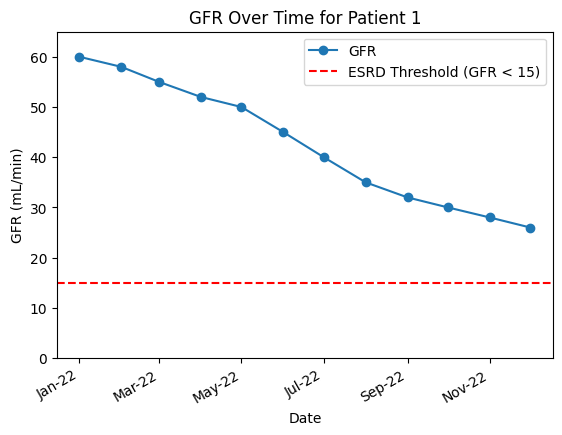

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load kidney function data
df = pd.read_csv('kidney_function.csv')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by Date
patient_data = df.sort_values('Date')

# Plot GFR over time
plt.plot(patient_data['Date'], patient_data['GFR (mL/min)'], marker='o', label='GFR')
plt.axhline(y=15, color='r', linestyle='--', label='ESRD Threshold (GFR < 15)')
plt.title('GFR Over Time for Patient 1')
plt.xlabel('Date')
plt.ylabel('GFR (mL/min)')

# Set y-axis to start at 0
plt.ylim(0, max(patient_data['GFR (mL/min)']) + 5)  # Add a bit of padding above the max value

# Format the x-axis to show dates as Jan-22
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()


In [5]:
# Calculate the difference in GFR over time (rate of change)
patient_data['GFR_change'] = patient_data['GFR (mL/min)'].diff() / patient_data['Date'].diff().dt.days

# Calculate the average rate of GFR decline per day
average_gfr_decline_per_day = patient_data['GFR_change'].mean()

print(f"Average GFR decline per day: {average_gfr_decline_per_day:.4f} mL/min/day")

Average GFR decline per day: -0.1017 mL/min/day


In [6]:
# Get the latest GFR value and date
latest_gfr = patient_data['GFR (mL/min)'].iloc[-1]
latest_date = patient_data['Date'].iloc[-1]

# Calculate days until GFR reaches 15
days_to_esrd = (latest_gfr - 15) / -average_gfr_decline_per_day

# Predict the date when GFR will reach 15
predicted_esrd_date = latest_date + pd.to_timedelta(days_to_esrd, unit='D')

# Format the predicted ESRD date as DD-MM-YYYY
formatted_predicted_date = predicted_esrd_date.strftime('%d/%m/%Y')

print(f"Predicted date for ESRD (GFR < 15 mL/min): {formatted_predicted_date}")

Predicted date for ESRD (GFR < 15 mL/min): 19/03/2023


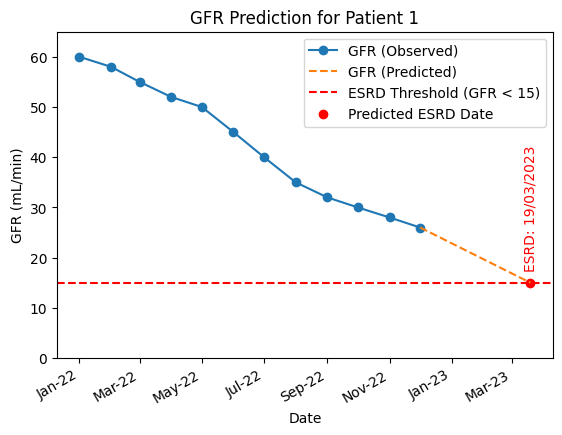

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming previous variables like latest_date, days_to_esrd, patient_data, etc., are already defined

# Create an array of future dates for extrapolation
future_dates = pd.date_range(start=latest_date, periods=int(days_to_esrd)+1)

# Extrapolate GFR values based on the rate of decline
future_gfr = latest_gfr + np.arange(0, len(future_dates)) * average_gfr_decline_per_day

# Predicted date when GFR reaches 15 mL/min
predicted_esrd_date = future_dates[-1]
predicted_gfr_value = future_gfr[-1]  # This should be around 15 mL/min

# Plot the GFR extrapolation
plt.plot(patient_data['Date'], patient_data['GFR (mL/min)'], marker='o', label='GFR (Observed)')
plt.plot(future_dates, future_gfr, linestyle='--', label='GFR (Predicted)')
plt.axhline(y=15, color='r', linestyle='--', label='ESRD Threshold (GFR < 15)')
plt.title('GFR Prediction for Patient 1')
plt.xlabel('Date')
plt.ylabel('GFR (mL/min)')

# Set y-axis to start at 0
plt.ylim(0, max(patient_data['GFR (mL/min)']) + 5)

# Format the x-axis to show dates as Jan-22
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

# Rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Add a marker and annotation for the predicted ESRD date
plt.scatter(predicted_esrd_date, predicted_gfr_value, color='red', label='Predicted ESRD Date')

# Vertical annotation with the date in DD/MM/YYYY format
plt.annotate(f'ESRD: {predicted_esrd_date.strftime("%d/%m/%Y")}',
             (predicted_esrd_date, predicted_gfr_value),
             textcoords="offset points", xytext=(0,10), ha='center', color='red', rotation=90)

plt.legend()
plt.show()


